# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Maria Anggraini Natio
- **Email:** natiomaria@gmail.com
- **ID Dicoding:** maria_natio01

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda dari waktu ke waktu secara keseluruhan?
- Pada waktu kapan terdapat jumlah permintaan penyewaan sepeda yang paling banyak dan paling sedikit di jam tertentu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
#memuat tabel day
days_df = pd.read_csv("data/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#memuat tabel jam
hours_df = pd.read_csv("data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
#menilai data hari
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
#cek missing value tabel hari
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#cek duplikasi data tabel hari
days_df.duplicated().sum()

0

In [7]:
#cek parameter statistik dari kolom numerik yang terdapat didalam days_df
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
#menilai data jam
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
#cek missing value tabel jam
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#cek duplikasi data tabel jam
hours_df.duplicated().sum()

0

In [11]:
#cek parameter statistik dari kolom numerik yang terdapat didalam hours_df
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [12]:
#Konversi dteday menjadi format datetime
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

In [13]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset days_df
days_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [14]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset hour_df
hours_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
#melihat rangkuman parameter statistik dari data days_df 
days_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [16]:
#penyewaan berdasarkan working day
days_df.groupby(by="workingday").agg({
    'instant' : 'nunique',
    "count_cr": ["max", "min", "mean", "std"]
})

instant count_cr                               
           nunique      max  min         mean          std
workingday                                                
0              231     8714  605  4330.168831  2052.141245
1              500     8362   22  4584.820000  1878.415583

In [17]:
#penyewaan berdasarkan weekday
days_df.groupby(by="one_of_week").agg({
    'instant' : 'nunique',
    "count_cr": ["max", "min", "mean", "std"]
})

instant count_cr                                
            nunique      max   min         mean          std
one_of_week                                                 
0               105     8227   605  4228.828571  1872.496629
1               105     7525    22  4338.123810  1793.074013
2               104     7767   683  4510.663462  1826.911642
3               104     8173   441  4548.538462  2038.095884
4               104     7804   431  4667.259615  1939.433317
5               104     8362  1167  4690.288462  1874.624870
6               105     8714   627  4550.542857  2196.693009

In [18]:
#penyewaan berdasarkan hari libur
days_df.groupby(by="holiday").agg({
    'instant' : 'nunique',
    "count_cr": ["max", "min", "mean", "std"]
})

instant count_cr                                
        nunique      max   min         mean          std
holiday                                                 
0           710     8714    22  4527.104225  1929.013947
1            21     7403  1000  3735.000000  2103.350660

In [19]:
#penyewaan berdasarkan bulan
days_df.groupby(by="month").agg({
    'instant' : 'nunique',
    "count_cr": ["max", "min", "mean", "std"]
})

instant count_cr                                
      nunique      max   min         mean          std
month                                                 
1          62     4521   431  2176.338710  1161.674370
2          57     5062  1005  2655.298246  1145.313307
3          62     8362   605  3692.258065  1899.301812
4          60     7460   795  4484.900000  1776.160778
5          62     8294  2633  5349.774194  1298.711561
6          60     8120  3767  5772.366667  1240.400031
7          62     8173  3285  5563.677419  1273.751871
8          62     7865  1115  5664.419355  1494.516146
9          60     8714  1842  5766.516667  1810.130649
10         62     8156    22  5199.225806  1988.392517
11         60     6852  1495  4247.183333  1285.712709
12         62     6606   441  3403.806452  1549.639353

In [20]:
#melihat rangkuman parameter statistik dari data hours_df 
hours_df.describe(include = "all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [21]:
#penyewaan berdasarkan jam
hours_df.groupby(by="hours").agg({
    'instant' : 'nunique',
    "count_cr": ["max", "min", "mean", "std"]
})

instant count_cr                            
      nunique      max min        mean         std
hours                                             
0         726      283   2   53.898072   42.307910
1         724      168   1   33.375691   33.538727
2         715      132   1   22.869930   26.578642
3         697       79   1   11.727403   13.239190
4         697       28   1    6.352941    4.143818
5         717       66   1   19.889819   13.200765
6         725      213   1   76.044138   55.084348
7         727      596   1  212.064649  161.441936
8         727      839   5  359.011004  235.189285
9         727      426  14  219.309491   93.703458
10        727      539   8  173.668501  102.205413
11        727      663  10  208.143054  127.495536
12        728      776   3  253.315934  145.081134
13        729      760  11  253.661180  148.107657
14        729      750  12  240.949246  147.271574
15        729      750   7  251.233196  144.632541
16        730      783  11  311.983562  148.682618
17        730      976  15  461.452055  232.656611
18        728      977  23  425.510989  224.639304
19        728      743  11  311.523352  161.050359
20        728      567  11  226.030220  119.670164
21        728      584   6  172.314560   89.788893
22        728      502   9  131.335165   69.937782
23        728      256   2   87.831044   50.846889

In [22]:
#menggabungkan tabel
days_hours_df = pd.merge(
    left = days_df,
    right = hours_df,
    how = "left",
    left_on = 'dteday',
    right_on = 'dteday'
)
days_hours_df.head()

,instant_x,dteday,season_x,year_x,month_x,holiday_x,one_of_week_x,workingday_x,weather_situation_x,temp_x,...,one_of_week_y,workingday_y,weather_situation_y,temp_y,atemp_y,humidity_y,wind_speed_y,casual_y,registered_y,count_cr_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
#menampilkan informasi tabel
days_hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant_x            17379 non-null  int64         
 1   dteday               17379 non-null  datetime64[ns]
 2   season_x             17379 non-null  int64         
 3   year_x               17379 non-null  int64         
 4   month_x              17379 non-null  int64         
 5   holiday_x            17379 non-null  int64         
 6   one_of_week_x        17379 non-null  int64         
 7   workingday_x         17379 non-null  int64         
 8   weather_situation_x  17379 non-null  int64         
 9   temp_x               17379 non-null  float64       
 10  atemp_x              17379 non-null  float64       
 11  humidity_x           17379 non-null  float64       
 12  wind_speed_x         17379 non-null  float64       
 13  casual_x             17379 non-

## Visualization & Explanatory Analysis

Tren Penyewaan Sepeda dari Waktu ke Waktu Secara Keseluruhan

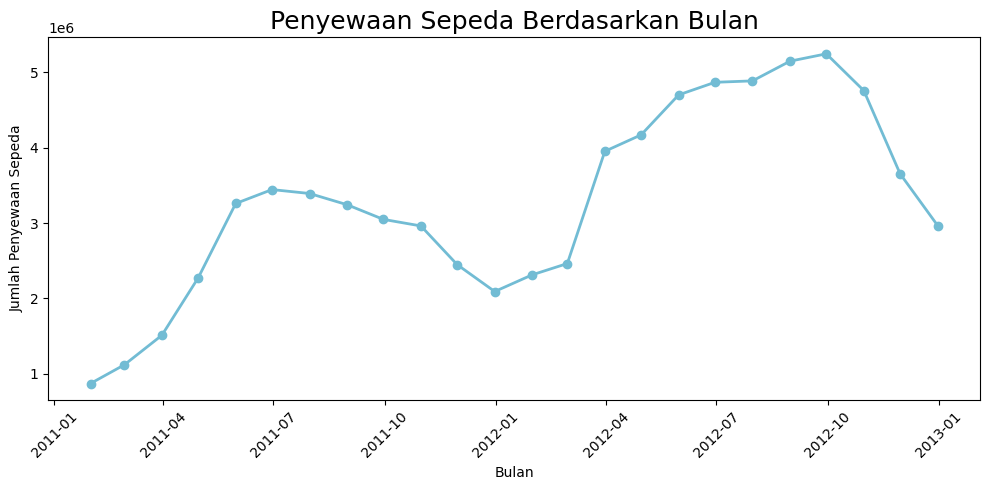

In [24]:
# Aggregate the data by month
monthly_df = days_hours_df.resample('M', on='dteday').sum()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(monthly_df.index, monthly_df['count_cr_x'],marker='o', linewidth=2, color="#72BCD4")
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Penyewaan Sepeda Berdasarkan Bulan', loc="center", fontsize=18)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Jumlah Permintaan Penyewaan Sepeda yang Paling Banyak dan Paling Sedikit di Jam Tertentu

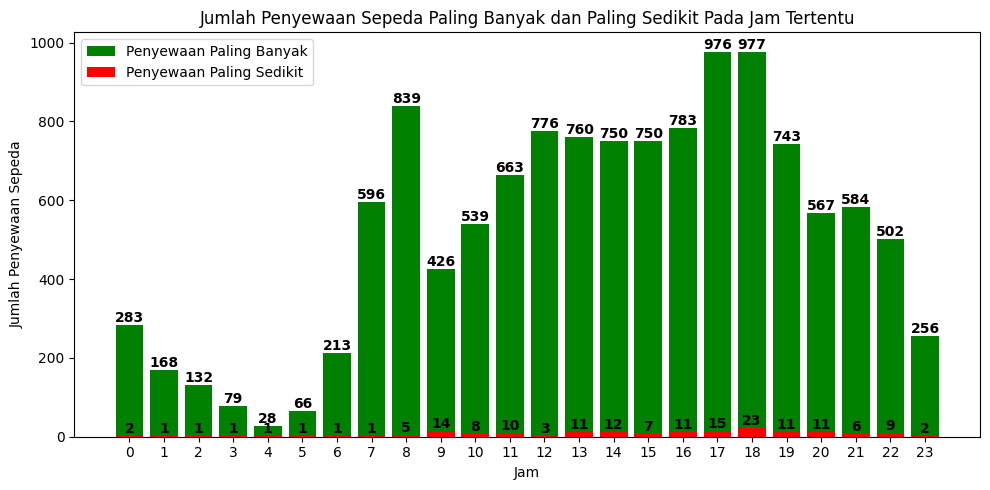

In [25]:
hours = days_hours_df.groupby("hours").agg({
    "instant_y": "nunique",
    "count_cr_y": ["max", "min"]
})

# Plot the data
plt.figure(figsize=(10, 5))
x = hours.index
max_y = hours[('count_cr_y', 'max')]
min_y = hours[('count_cr_y', 'min')]

plt.bar(x, max_y, label='Penyewaan Paling Banyak', color='green')
plt.bar(x, min_y, label='Penyewaan Paling Sedikit', color='red')

plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Jumlah Penyewaan Sepeda Paling Banyak dan Paling Sedikit Pada Jam Tertentu')

hour_labels = [str(i) for i in x]
plt.xticks(x, hour_labels)

plt.legend()

# Annotate the maximum and minimum values
for i, (max_val, min_val) in enumerate(zip(max_y, min_y)):
    plt.text(i, max_val, str(max_val), ha='center', va='bottom', fontweight='bold')
    plt.text(i, min_val, str(min_val), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Conclusion

- Tren penyewaan sepeda mengalami perkembangan yang fluktuatif dari tahun 2011-2012 pada tiap bulan.
- Penyewaan sepeda memiliki jumlah penyewaan tertinggi di pukul 6 sore berjumlah 977 sepeda, disusul pukul 5 sore berjumlah 976 sepeda, dan jumlah penyewaan terendah pernah terjadi pada pukul 6 sore yaitu sebanyak 23 sepeda 

Teknis Analisis Lanjutan

In [26]:
#RFM Analysis
current_date = max(hours_df['dteday'])
rfm_df = hours_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


In [27]:
#Clustering
#total pengguna berdasarkan humidity
hours_df.groupby(by="humidity").agg({
    "count_cr": ["count"]})

,count_cr
,count
humidity,
0.00,22
0.08,1
0.10,1
0.12,1
0.13,1
...,...
0.93,331
0.94,560


In [125]:
#save days_hours_df
days_hours_df.to_csv('days_hours.csv', index=False)